Importing Required Modules for Data Visualization 

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd 
import math as ma

Importing Contents of Parent Folder 

In [10]:
print(os.listdir("C:\Work\Estimation-of-Software-Development-Effort-main"))


['.git', '.gitignore', 'Building a Graph.ipynb', 'cocomo.csv', 'cocomo81.csv', 'com.csv', 'Comparison.ipynb', 'des.csv', 'Effort_estimation_GNN (2).ipynb', 'EOSDF_Document.pdf', 'Final.ipynb', 'Graphs_of_4_Datasets.ipynb', 'index.html', 'ISBSG Dataset', 'ISBSG.csv', 'particles.js', 'README.md', 'Visualisation_ISBSG.ipynb', 'Visualization_cocomo.ipynb', 'Visualization_cocomo81.ipynb', 'Visualization_Deshanis.ipynb']


Distribution graphs (histogram/bar graph) of column data

In [11]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = ma.floor((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

Displaying CorrelationMatrix

In [12]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') 
    df = df[[col for col in df if df[col].nunique() > 1]] 
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

ScatterMatrix plotting

In [13]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [14]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv("C:\Work\Estimation-of-Software-Development-Effort-main\cocomo81.csv", delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'cocomo81.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 63 rows and 17 columns


In [15]:
df1.head(17)

,rely,data,cplx,time,stor,virt,turn,acap,aexp,pcap,vexp,lexp,modp,tool,sced,loc,actual
0,0.88,1.16,0.70,1.00,1.06,1.15,1.07,1.19,1.13,1.17,1.10,1.00,1.24,1.10,1.04,113.0,2040.0
1,0.88,1.16,0.85,1.00,1.06,1.00,1.07,1.00,0.91,1.00,0.90,0.95,1.10,1.00,1.00,293.0,1600.0
2,1.00,1.16,0.85,1.00,1.00,0.87,0.94,0.86,0.82,0.86,0.90,0.95,0.91,0.91,1.00,132.0,243.0
3,0.75,1.16,0.70,1.00,1.00,0.87,1.00,1.19,0.91,1.42,1.00,0.95,1.24,1.00,1.04,60.0,240.0
4,0.88,0.94,1.00,1.00,1.00,0.87,1.00,1.00,1.00,0.86,0.90,0.95,1.24,1.00,1.00,16.0,33.0
5,0.75,1.00,0.85,1.00,1.21,1.00,1.00,1.46,1.00,1.42,0.90,0.95,1.24,1.10,1.00,4.0,43.0
6,0.75,1.00,1.00,1.00,1.00,0.87,0.87,1.00,1.00,1.00,0.90,0.95,0.91,0.91,1.00,6.9,8.0
7,1.15,0.94,1.30,1.66,1.56,1.30,1.00,0.71,0.91,1.00,1.21,1.14,1.10,1.10,1.08,22.0,1075.0
8,1.15,0.94,1.30,1.30,1.21,1.15,1.00,0.86,1.00,0.86,1.10,1.07,0.91,1.00,1.00,30.0,423.0
9,1.40,0.94,1.30,1.11,1.56,1.00,1.07,0.86,0.82,0.86,0.90,1.00,1.00,1.00,1.00,29.0,321.0


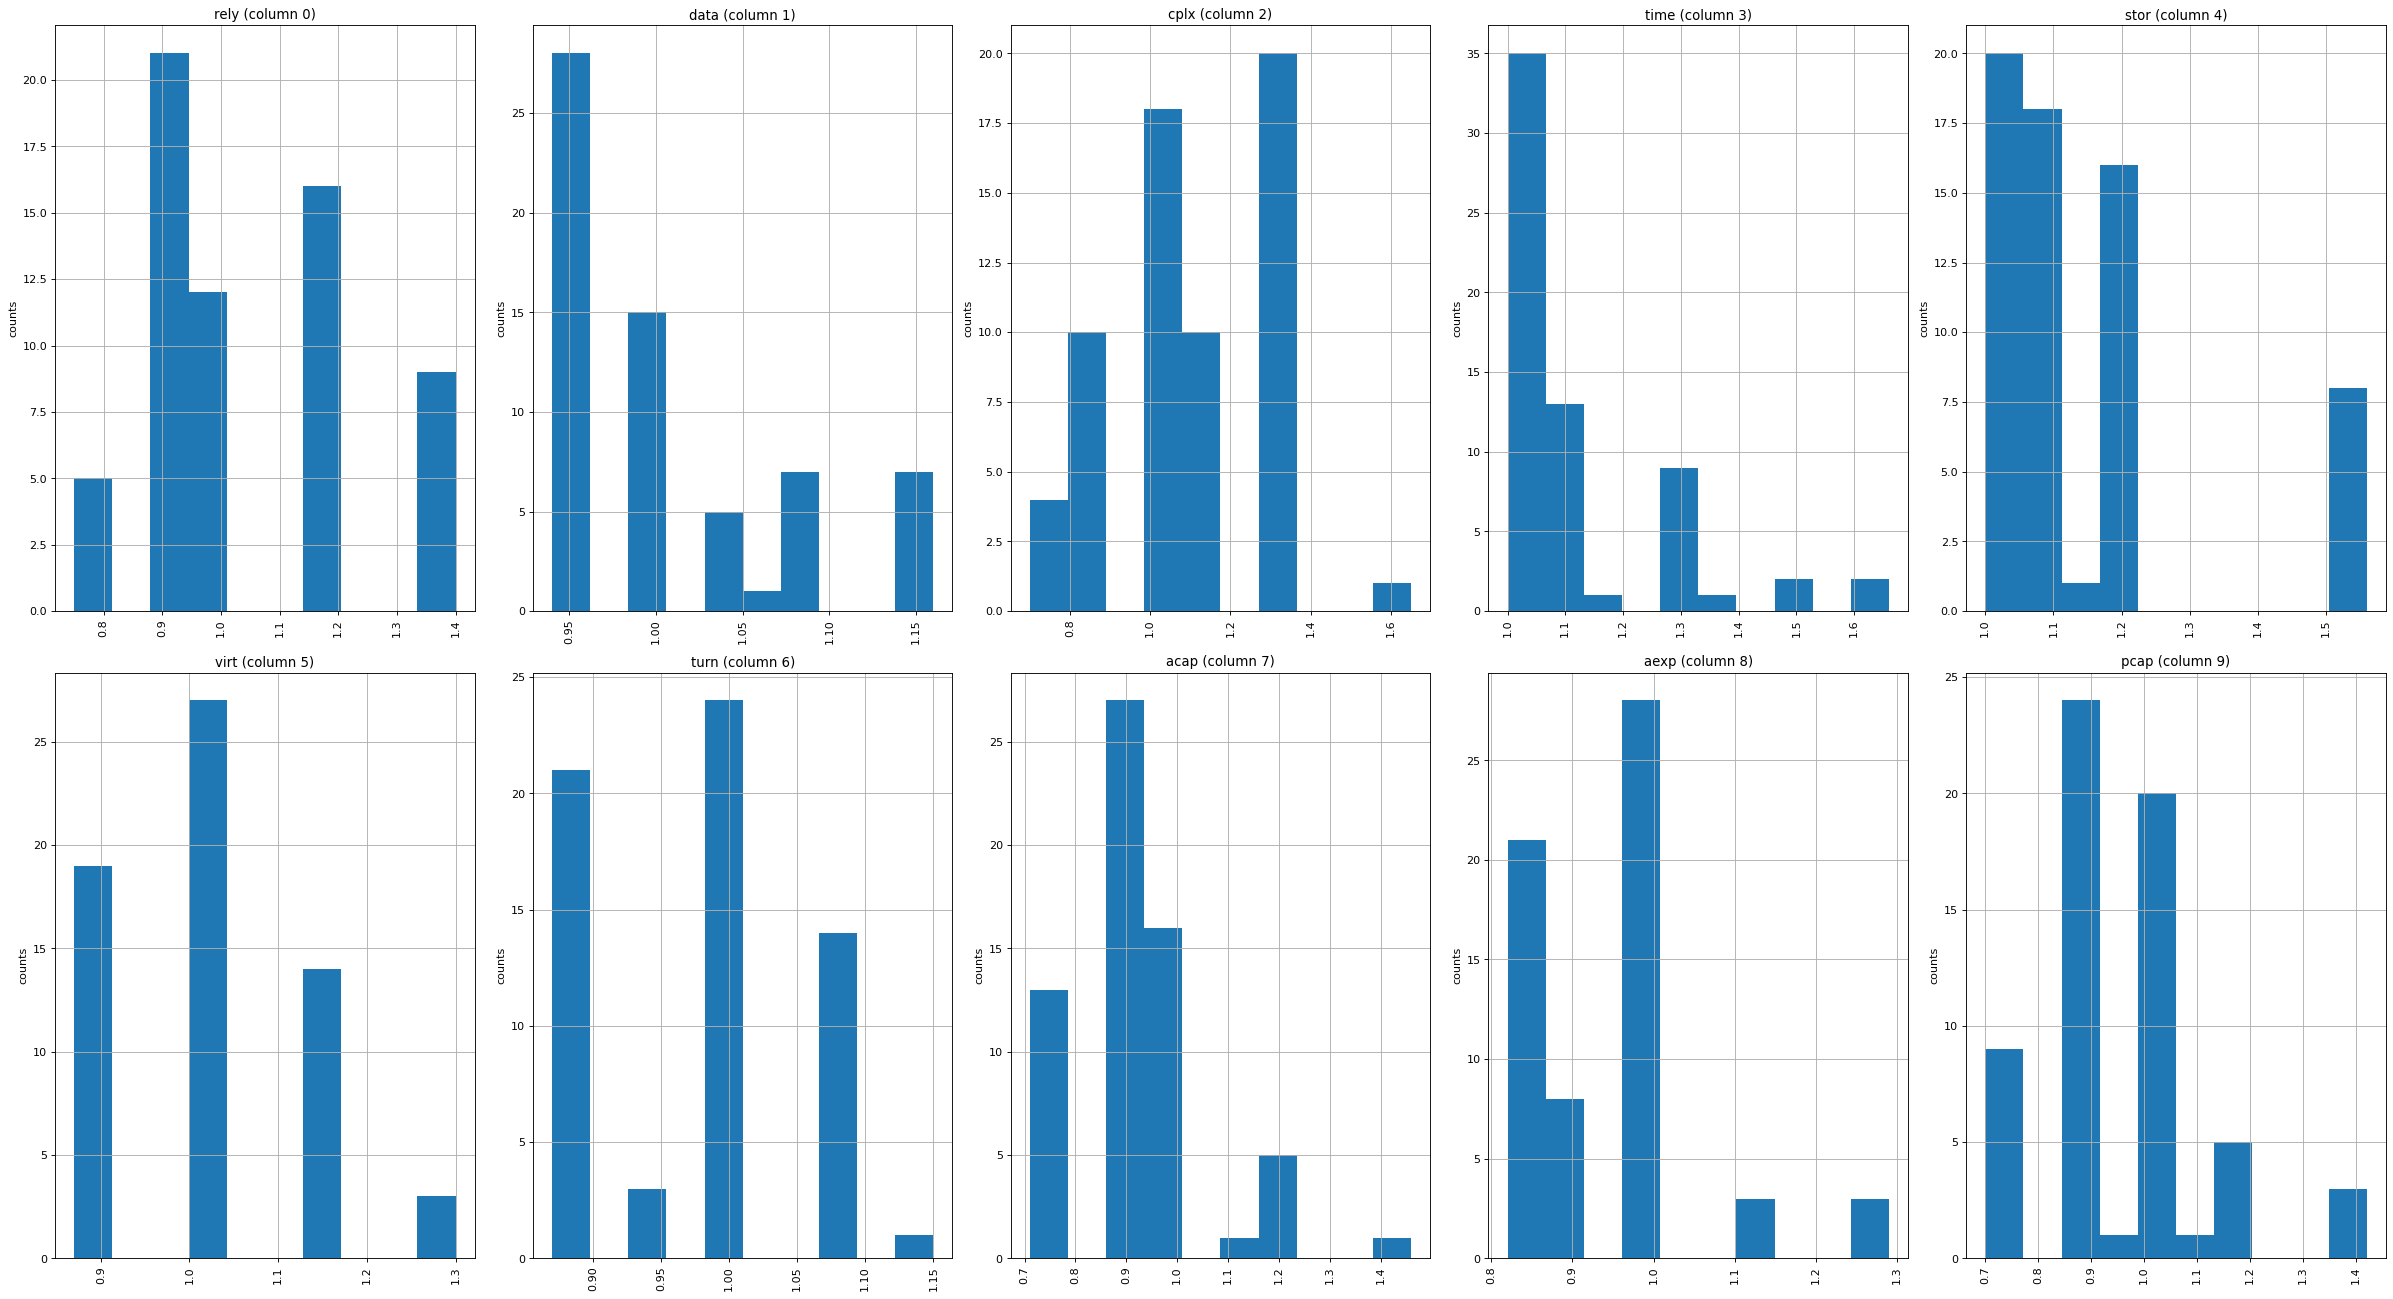

In [16]:
plotPerColumnDistribution(df1, 10, 5)

C:\Users\singh\AppData\Local\Temp\ipykernel_12180\3844119853.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


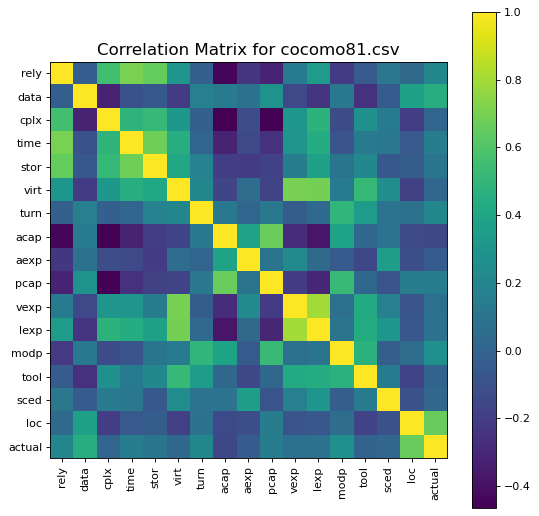

In [17]:
plotCorrelationMatrix(df1, 8)

C:\Users\singh\AppData\Local\Temp\ipykernel_12180\844214064.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


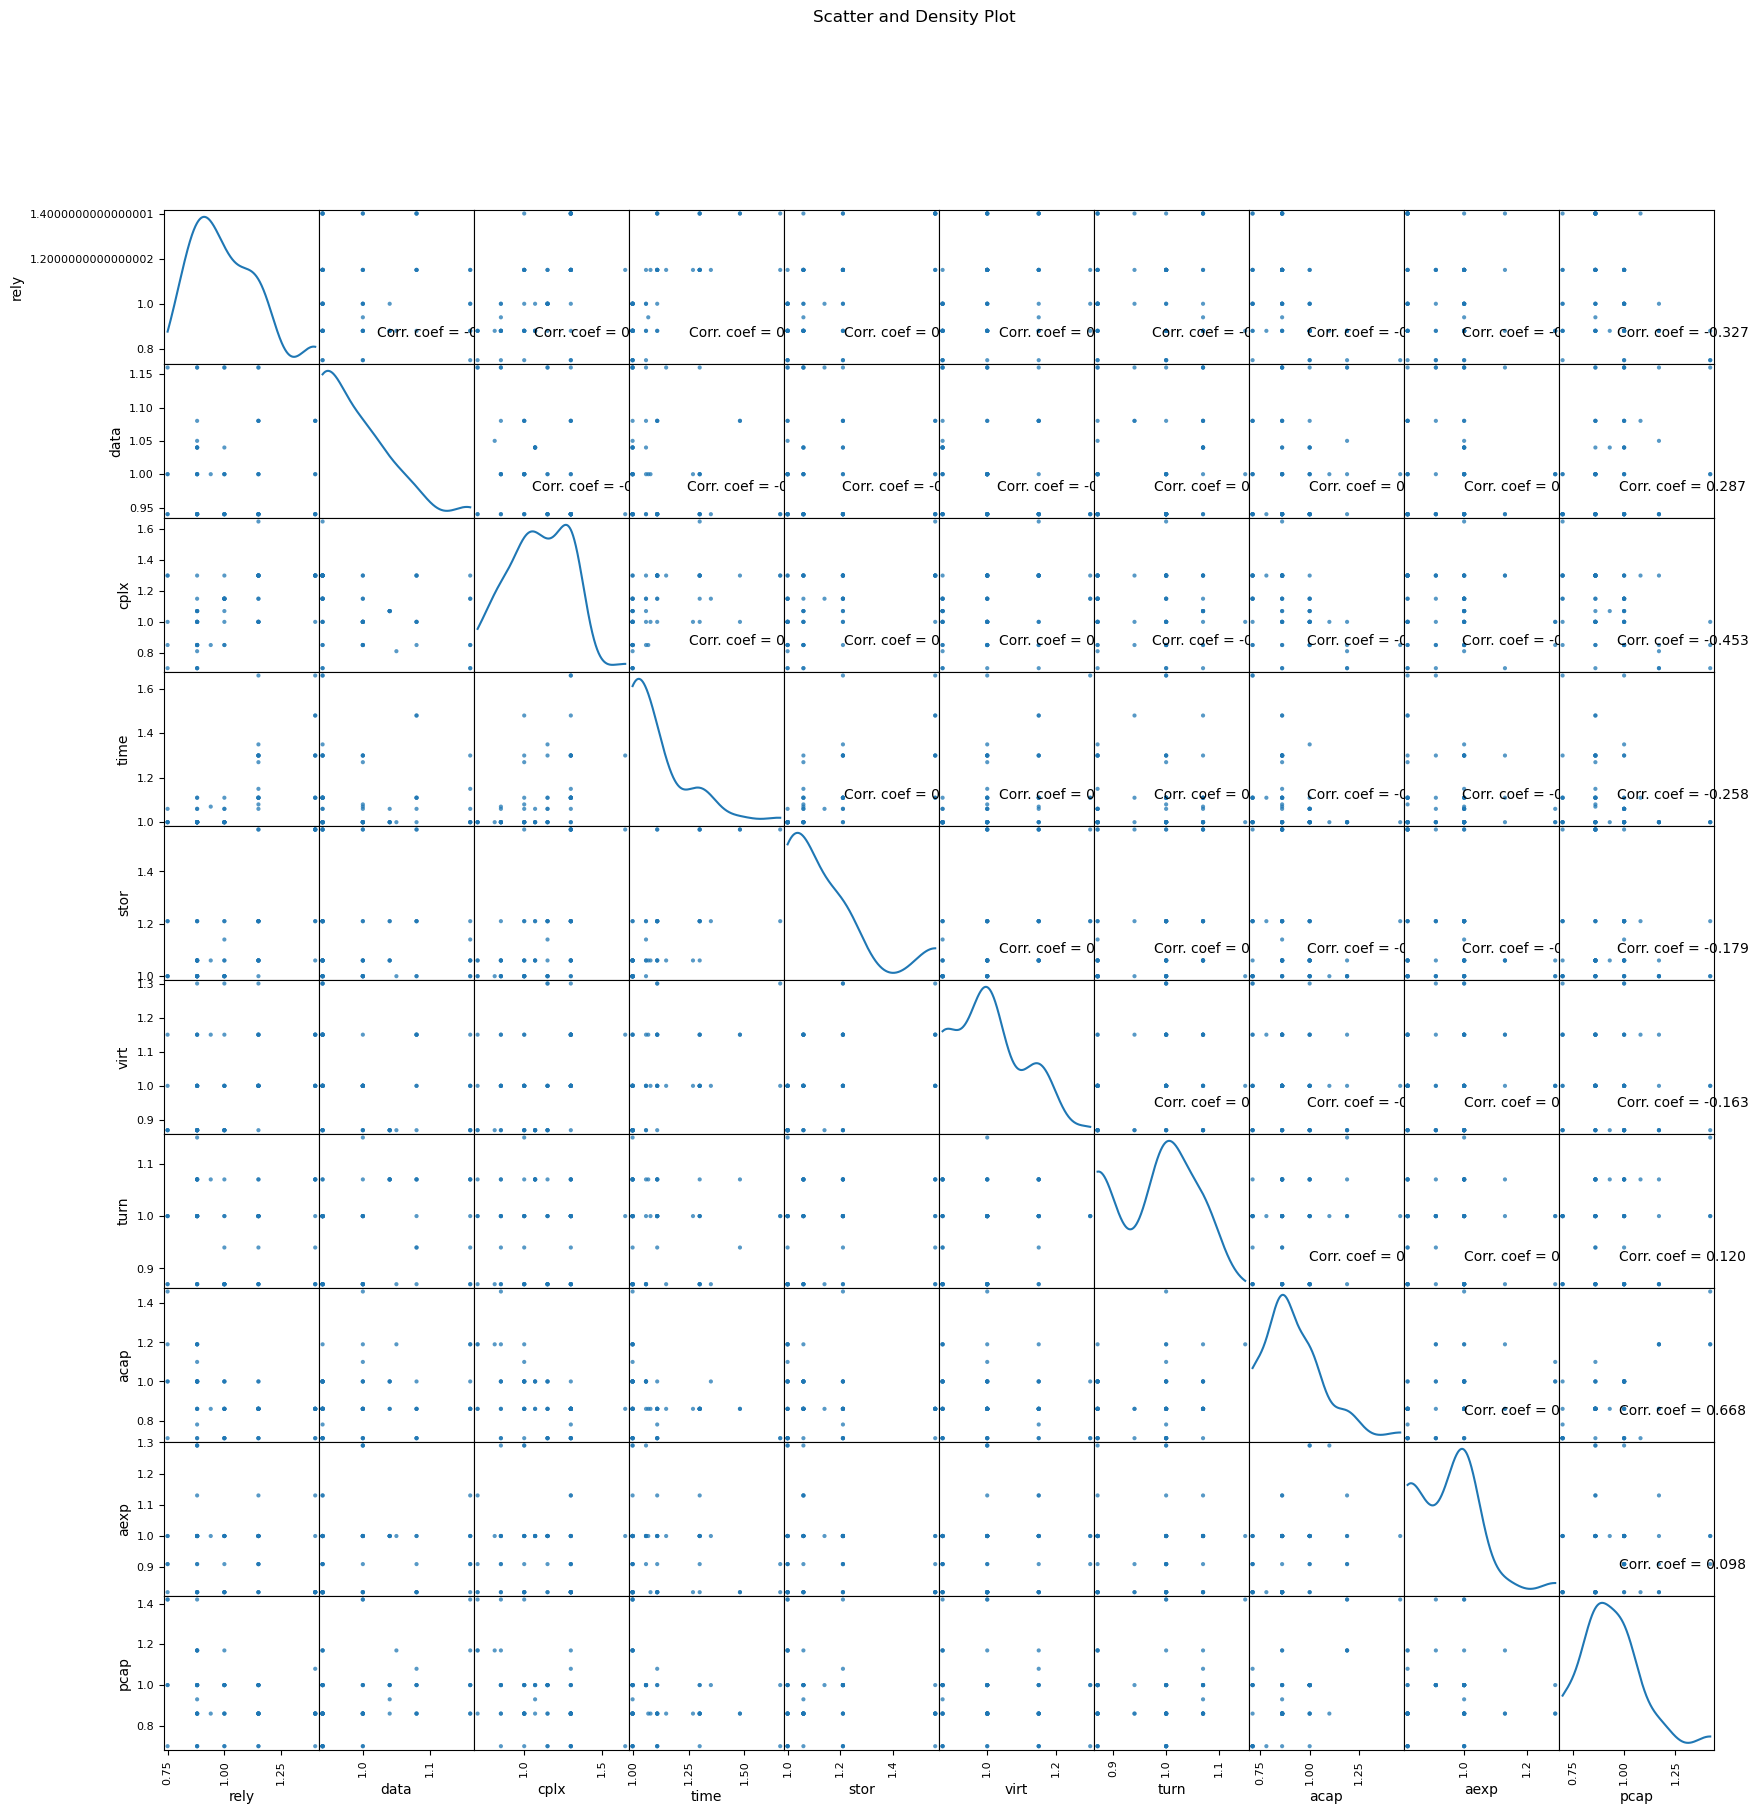

In [18]:
plotScatterMatrix(df1, 20, 10)